In [1]:
from __future__ import division 
import re, math, random 
import matplotlib.pyplot as plt 
from collections import defaultdict, Counter
from functools import partial, reduce

import numpy as np

In [2]:
def vector_add(v, w):
    """adds two vector componentwise """
    return [v_i + w_i for v_i, w_i in zip(v,w)]

In [3]:
v = [x for x in range(1, 11, 2)]
w = [y for y in range(11, 21, 2)]

In [4]:
vector_add(v, w)

# [v for v in range(1, 11, 2)] == [1, 3, 5, 7, 9]
# [w for w in range(10, 21, 2)] == [11, 13, 15, 17, 19]

[12, 16, 20, 24, 28]

In [5]:
# numpy version
np.array(v) + np.array(w)

array([12, 16, 20, 24, 28])

In [6]:
# vector, numpy 덧셈의 속도 비교
%timeit vector_add(v, w)
%timeit np.array(v) + np.array(w)

605 ns ± 5.74 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.07 µs ± 9.82 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

In [8]:
vector_subtract(v, w)

[-10, -10, -10, -10, -10]

In [9]:
# numpy version
np.array(v) - np.array(w)

array([-10, -10, -10, -10, -10])

##### 여러 개의 vector를 list로 만들어서 sum 연산을 하는 경우

In [10]:
def vector_sum(vectors):
    return reduce(vector_add, vectors)

In [11]:
vectors = [v, w, v, w, v, w]
vector_sum(vectors)

[36, 48, 60, 72, 84]

In [12]:
def vector_sum_modified(vectors):
    return [sum(value) for value in zip(*vectors)]

In [13]:
vector_sum_modified(vectors)

[36, 48, 60, 72, 84]

In [14]:
%timeit vector_sum(vectors)
%timeit vector_sum_modified(vectors)

3.01 µs ± 8.77 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.09 µs ± 3.77 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [15]:
# numpy version
np.sum([v, w, v, w, v, w], axis=0)

# axis=0은 row [v, w, v, w, v, w]를 하나의 matrix로 생각했을 때, column별 sum operation
# axis=1은 row[v, w, v, w, v, w]를 하나의 maxtrix로 생각했을 때, row별 sum operation

array([36, 48, 60, 72, 84])

In [16]:
# np.sum([v, w, v, w, v, w], axis=1)

##### Scalar Vector의 연산
2[1, 2, 3, 4] = [2, 4, 6, 8]

In [17]:
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

In [18]:
v = [5, 6, 7, 8]
scalar = 3

scalar_multiply(scalar, v)

[15, 18, 21, 24]

In [19]:
# numpy version: numpy는 배열의 크기가 다르더라도 기본적인 vector연산을 가능하도록 지원한다. (broadcasting)

scalar * np.array(v)

array([15, 18, 21, 24])

##### vector의 평균 구하기
크기가 같은 vector를 matrix 형태로 입력했을 경우, 각 row별 평균을 구함

In [20]:
def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [21]:
v = [1, 2, 3, 4]
w = [-4, -3, -2, -1]

vector_mean([v, v, v, v])

[1.0, 2.0, 3.0, 4.0]

In [22]:
np.mean([v, v, v, v], axis=0)

# axis=0은 row[v, w, v, w, v, w]를 하나의 matrix로 생각했을 때, column별로 mean operation
# axis=1은 row[v, w, v, w, v, w]를 하나의 maxtrix로 생각했을 때, row별로 mean operation

array([1., 2., 3., 4.])

##### Vector dot product
크기가 같은 두 개의 vector가 있으면, 같은 column에 해당하는 값을 곱한 후 모든 값을 더한다

In [23]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [24]:
v = [1, 2, 3, 4]
w = [-4, -3, -2, -1]

dot(v, w)

-20

In [25]:
# numpy version
np.dot(v, w)

-20

##### 하나의 vector에서 값 element들을 제곱하여 더한 후 값을 반환

In [26]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [27]:
v = [1, 2, 3, 4]
sum_of_squares(v) # v * v = [1, 4, 9, 16]

30

In [28]:
# numpy version
np.dot(v, v) # or sum(np.square(v))

30

##### magnitude 
하나의 vector를 dot_product한 후 양의 제곱근을 구한다

In [29]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

In [30]:
magnitude(v)

5.477225575051661

In [31]:
# numpy version
np.linalg.norm(v)

5.477225575051661

##### Distance 구하기
vector간의 거리를 구하는 공식
* 파타고라스의 정리 처럼, 두 점(두 벡터) 사이의 거리는 (x1 - y1)^2 + (x2 - y2)^2 의 제곱근을 구해주면 됨
* 피타고라스의 정리 처럼 두 점이 이차원 평면이 아닌 n차원의 vector로 구성되는 차이점이 있음
* 정식 명칭은 Eculidian distance 라고 함

In [32]:
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))

In [33]:
v = [1, 2, 3, 4]
w = [-4, -3, -2, -1]

squared_distance(v, w)

100

In [34]:
distance(v, w)

10.0

In [35]:
# numpy version
np.linalg.norm(np.subtract(v, w))

10.0

In [36]:
np.sqrt(np.sum(np.subtract(v, w)**2))

10.0

##### Matrix indexing
* shape: matrix의 크기를 구함
* get_row: matrix에서 하나의 row을 추출함
* get_column: matrix에서 하나의 column을 추출함

In [37]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A, i):
    return A[i]

def get_column(A, j):
    return [A_i[j] for A_i in A]

In [38]:
example_matrix = [[1, 2, 3, 4, 5], [11, 12, 13, 14, 15], [21, 22, 23, 24, 25]]

shape(example_matrix)

(3, 5)

In [39]:
get_row(example_matrix, 0)

[1, 2, 3, 4, 5]

In [40]:
get_column(example_matrix, 3)

[4, 14, 24]

In [41]:
# numpy version
np.shape(example_matrix)

(3, 5)

In [42]:
example_matrix = np.array(example_matrix)
example_matrix[0] # row slicing

array([1, 2, 3, 4, 5])

In [43]:
example_matrix[:, 3] # row slicing

array([ 4, 14, 24])

##### Matrix operation

* make_matirx: entry_fn을 기준으로 num_rows와 num_cols을 생성함
* id_diagonal: 대각행렬이 1 matrix를 만들기 위해, row와 column 의 값이 같으면 1 아니면 0을 반환
* matrix_add: matrix간 덧셈

In [44]:
def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix
    whose (i, j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)]

In [45]:
def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

In [46]:
identity_matrix = make_matrix(5, 5, is_diagonal)

identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [47]:
# numpy version
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [48]:
riendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

In [49]:
def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")
    
    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]
    
    return make_matrix(num_rows, num_cols, entry_fn)

In [50]:
A = [[ 1., 0., 0.], [ 0., 1., 2.]]
B = [[ 5., 4., 3.], [ 2., 2., 2.]]

matrix_add(A,B)

[[6.0, 4.0, 3.0], [2.0, 3.0, 4.0]]

In [51]:
# numpy version
np.add(A, B)

array([[6., 4., 3.],
       [2., 3., 4.]])

In [52]:
def make_graph_dot_product_as_vector_projection(plt):
    v = [2, 1]
    w = [math.sqrt(.25), math.sqrt(.75)]
    c = dot(v, w)
    vonw = scalar_multiply(c, w)
    o = [0,0]

    plt.arrow(0, 0, v[0], v[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("v", v, xytext=[v[0] + 0.1, v[1]])
    plt.arrow(0 ,0, w[0], w[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])
    plt.arrow(0, 0, vonw[0], vonw[1], length_includes_head=True)
    plt.annotate(u"(v•w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.1])
    plt.arrow(v[0], v[1], vonw[0] - v[0], vonw[1] - v[1], 
              linestyle='dotted', length_includes_head=True)
    plt.scatter(*zip(v,w,o),marker='.')
    plt.axis([0,2,0,2]) 
    plt.show()

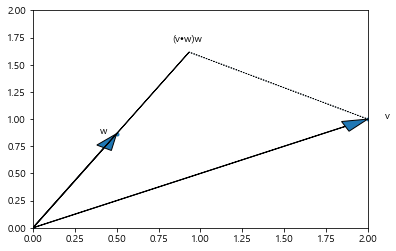

In [53]:
make_graph_dot_product_as_vector_projection(plt)